In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from copy import copy

In [2]:
def matrix_generation(n = 10, maxe = 20):
  return np.random.randint(low = 1, high = maxe + 1, size = (n, n))

def matrix_trans(A, pattern):
  B = np.zeros_like(A)
  N = len(A)
  for i in range(N):

    for j in range(N):
      for k in pattern:
        if k[0] == i:
          B[i][j] += A[j][k[1]]
  return B

In [3]:
pattern1 = [[1,2], [1,3], [2,2], [2,5], [2,6], [3,7], [3,9], [7,2], [7,3], [7,10], [10,2], [10,5]]
pattern1 = np.array(pattern1) - 1
pattern2 = [[1, 3], [1,4], [3,2], [3,3], [3,4], [4,4], [4,5], [4,6], [5,1], [6,1], [6,2]]
pattern2 = np.array(pattern2) - 1

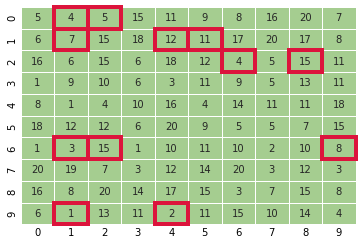

In [ ]:
N = 10
A = matrix_generation(N, 20)
ax = sns.heatmap(A, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="crest")
for i in range(len(pattern1)):
   ax.add_patch(Rectangle((pattern1[i][1], pattern1[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))

ax.tick_params(length=0)
plt.savefig("pattern1.jpg", dpi=500)
plt.show()

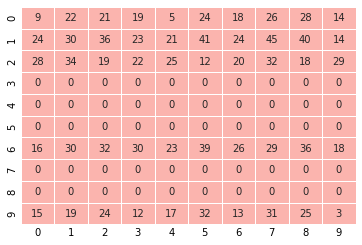

In [ ]:
B = matrix_trans(A, pattern1)

ax = sns.heatmap(B, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap='Pastel1')


ax.tick_params(length=0)
plt.savefig("NewMatrix.jpg", dpi=500)
plt.show()

In [4]:
def min_zero_row(zero_mat, mark_zero):

    #Find the row
    min_row = [99999, -1]

    for row_num in range(zero_mat.shape[0]): 
        if np.sum(zero_mat[row_num] == True) > 0 and min_row[0] > np.sum(zero_mat[row_num] == True):
            min_row = [np.sum(zero_mat[row_num] == True), row_num]

    # Marked the specific row and column as False
    zero_index = np.where(zero_mat[min_row[1]] == True)[0][0]
    mark_zero.append((min_row[1], zero_index))
    zero_mat[min_row[1], :] = False
    zero_mat[:, zero_index] = False

def mark_matrix(mat):

  #Transform the matrix to boolean matrix(0 = True, others = False)
  cur_mat = mat
  zero_bool_mat = (cur_mat == 0)
  zero_bool_mat_copy = zero_bool_mat.copy()

  #Recording possible answer positions by marked_zero
  marked_zero = []
  num = 0
  while (True in zero_bool_mat_copy):
    min_zero_row(zero_bool_mat_copy, marked_zero)
    #ax = sns.heatmap(zero_bool_mat_copy, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap='cool')
    #ax.tick_params(length=0)
    #plt.savefig('Mark_'+ str(num)+'.jpg', dpi=500)
    #num += 1
    #plt.show()
  #ax = sns.heatmap(cur_mat, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="Wistia")
  #for i in range(len(marked_zero)):
    #ax.add_patch(Rectangle((marked_zero[i][1], marked_zero[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))
  #ax.tick_params(length=0)
  #plt.savefig('marked_'+str(num)+'.jpg', dpi=500)
  #plt.show()
  #Recording the row and column positions seperately.
  marked_zero_row = []
  marked_zero_col = []
  for i in range(len(marked_zero)):
    marked_zero_row.append(marked_zero[i][0])
    marked_zero_col.append(marked_zero[i][1])

  #Step 2-2-1
  non_marked_row = list(set(range(cur_mat.shape[0])) - set(marked_zero_row))
	
  marked_cols = []
  check_switch = True
  while check_switch:
    check_switch = False
    for i in range(len(non_marked_row)):
      row_array = zero_bool_mat[non_marked_row[i], :]
      for j in range(row_array.shape[0]):
        #Step 2-2-2
        if row_array[j] == True and j not in marked_cols:
          #Step 2-2-3
          marked_cols.append(j)
          check_switch = True

    for row_num, col_num in marked_zero:
      #Step 2-2-4
      if row_num not in non_marked_row and col_num in marked_cols:
        #Step 2-2-5
        non_marked_row.append(row_num)
        check_switch = True
  #Step 2-2-6
  marked_rows = list(set(range(mat.shape[0])) - set(non_marked_row))

  return(marked_zero, marked_rows, marked_cols)
 
def adjust_matrix(mat, cover_rows, cover_cols):
  cur_mat = mat
  non_zero_element = []

  #Step 4-1
  for row in range(len(cur_mat)):
    if row not in cover_rows:
      for i in range(len(cur_mat[row])):
        if i not in cover_cols:
          non_zero_element.append(cur_mat[row][i])
          #print(row, i)
  min_num = min(non_zero_element)
  print(min_num)
  #Step 4-2
  for row in range(len(cur_mat)):
    if row not in cover_rows:
      for i in range(len(cur_mat[row])):
        if i not in cover_cols:
          cur_mat[row, i] = cur_mat[row, i] - min_num
  #Step 4-3
  for row in range(len(cover_rows)):  
    for col in range(len(cover_cols)):
      cur_mat[cover_rows[row], cover_cols[col]] = cur_mat[cover_rows[row], cover_cols[col]] + min_num
  return cur_mat


def ans_calculation(mat, pos):
	total = 0
	ans_mat = np.zeros((mat.shape[0], mat.shape[1]))
	for i in range(len(pos)):
		total += mat[pos[i][0], pos[i][1]]
		ans_mat[pos[i][0], pos[i][1]] = mat[pos[i][0], pos[i][1]]
	return total, ans_mat

In [5]:
def Hungary(M):
  n = len(M)
  current = M
  for i in range(n):
    current[i] = current[i] - np.min(current[i])
  for i in range(n):
    current[:,i] = current[:,i] - np.min(current[:,i])
  ax = sns.heatmap(current, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap='Paired')
  ax.tick_params(length=0)
  plt.savefig("H_step1.jpg", dpi=500)
  plt.show()

  zero_count = 0
  num = 0
  while zero_count < n:
    ans_pos, marked_rows, marked_cols = mark_matrix(current)
    zero_count = len(marked_rows) + len(marked_cols)

    ax = sns.heatmap(current, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="cool")
    for i in range(len(ans_pos)):
      ax.add_patch(Rectangle((ans_pos[i][1], ans_pos[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))
    ax.tick_params(length=0)
    plt.savefig('current_'+str(num)+'.jpg', dpi=500)
    plt.show()

    if zero_count < n:
      current = adjust_matrix(current, marked_rows, marked_cols)
      num += 1

  return ans_pos

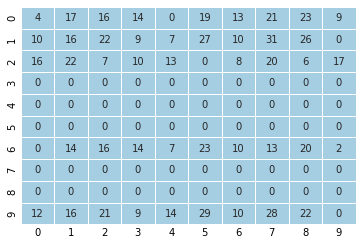

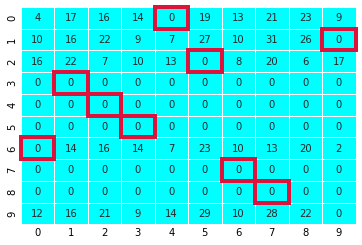

7


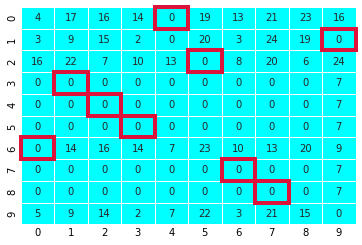

2


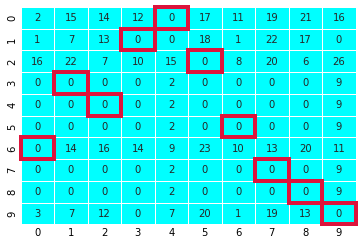

min sum is 59


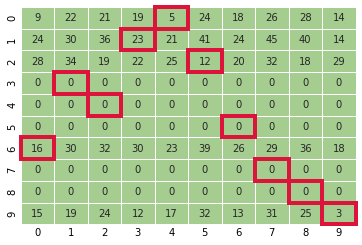

In [ ]:
ans_pos = Hungary(B.copy())
ans, ans_mat = ans_calculation(B, ans_pos)
print("min sum is", ans)
ax = sns.heatmap(B, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="crest")
for i in range(len(ans_pos)):
   ax.add_patch(Rectangle((ans_pos[i][1], ans_pos[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))

ax.tick_params(length=0)
plt.savefig("Answer.jpg", dpi=500)
plt.show()


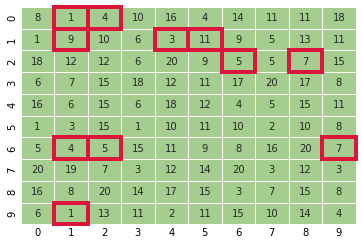

In [ ]:
pi = np.zeros(N)
for e in ans_pos:
  pi[e[0]] = e[1]
A_ans = np.zeros_like(A)
for i in range(N):
  A_ans[i] = A[int(pi[i])]

ax = sns.heatmap(A_ans, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="crest")
for i in range(len(pattern2)):
   ax.add_patch(Rectangle((pattern1[i][1], pattern1[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))

ax.tick_params(length=0)
plt.savefig("Ans.jpg", dpi=500)
plt.show()

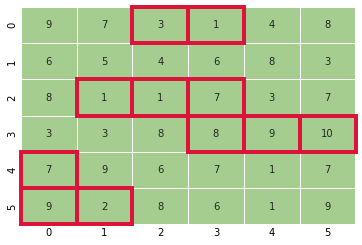

In [6]:
N = 6
A = matrix_generation(N, 10)
ax = sns.heatmap(A, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="crest")
for i in range(len(pattern2)):
   ax.add_patch(Rectangle((pattern2[i][1], pattern2[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))

ax.tick_params(length=0)
plt.savefig("pattern2.jpg", dpi=500)
plt.show()

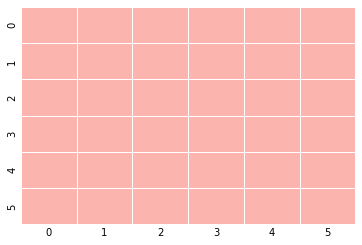

In [7]:
B = matrix_trans(A, pattern2)

ax = sns.heatmap(B, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap='Pastel1')


ax.tick_params(length=0)
plt.savefig("NewMatrix.jpg", dpi=500)
plt.show()

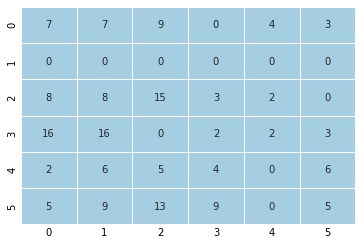

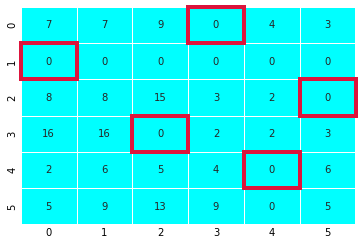

2


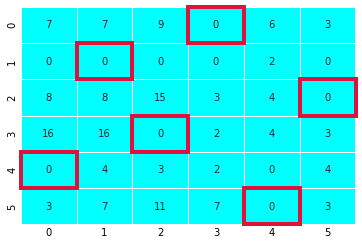

min sum is 28


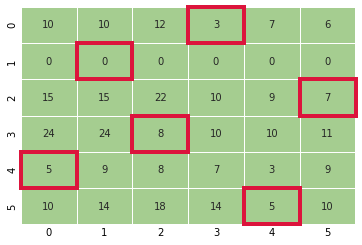

In [ ]:
ans_pos = Hungary(B.copy())
ans, ans_mat = ans_calculation(B, ans_pos)
print("min sum is", ans)
ax = sns.heatmap(B, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="crest")
for i in range(len(ans_pos)):
   ax.add_patch(Rectangle((ans_pos[i][1], ans_pos[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))

ax.tick_params(length=0)
plt.savefig("Answer.jpg", dpi=500)
plt.show()

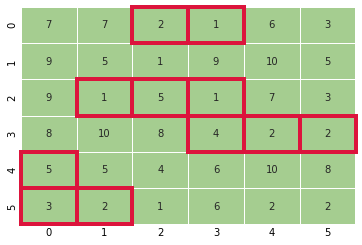

In [ ]:
pi = np.zeros(N)
for e in ans_pos:
  pi[e[0]] = e[1]
A_ans = np.zeros_like(A)
for i in range(N):
  A_ans[i] = A[int(pi[i])]

ax = sns.heatmap(A_ans, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="crest")
for i in range(len(pattern2)):
   ax.add_patch(Rectangle((pattern2[i][1], pattern2[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))

ax.tick_params(length=0)
plt.savefig("Ans2.jpg", dpi=500)
plt.show()

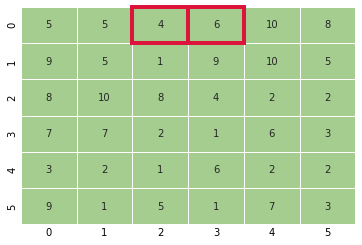

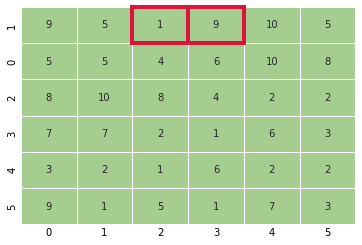

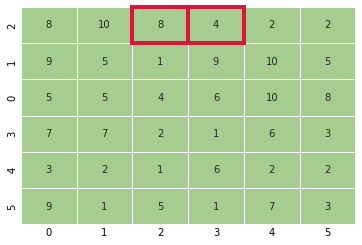

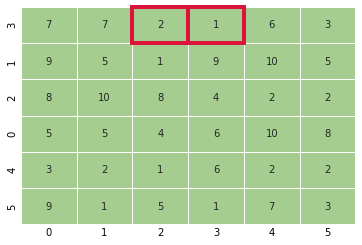

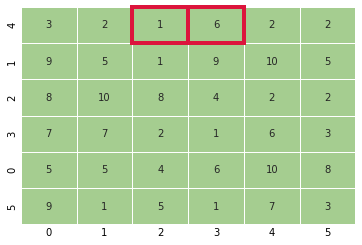

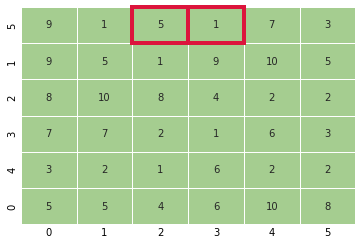

In [16]:
N = 6
pattern3 = [[0,2], [0,3]]
A = np.array([[5,5,4,6,10,8], [9,5,1,9,10,5], [8,10,8,4,2,2], [7,7,2,1,6,3], [3,2,1,6,2,2], [9,1,5,1,7,3]])



for j in range(6):
  A_1 = A.copy()
  A_1[j] = A[0]
  A_1[0] = A[j]
  y_axis_labels = np.arange(6)
  y_axis_labels[0] = j
  y_axis_labels[j] = 0
  ax = sns.heatmap(A_1, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="crest", yticklabels=y_axis_labels)
  for i in range(len(pattern3)):
    ax.add_patch(Rectangle((pattern3[i][1], pattern3[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))
  ax.tick_params(length=0)
  plt.savefig('pat'+str(j)+'.jpg', dpi=500)
  plt.show()

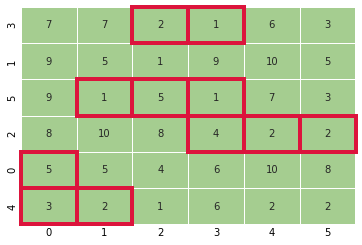

In [18]:
A = np.array([[5,5,4,6,10,8], [9,5,1,9,10,5], [8,10,8,4,2,2], [7,7,2,1,6,3], [3,2,1,6,2,2], [9,1,5,1,7,3]])
A_a = np.zeros_like(A)
A_a[0] = A[3]
A_a[1] = A[1]
A_a[2] = A[5]
A_a[3] = A[2]
A_a[4] = A[0]
A_a[5] = A[4]

y_axis_labels = np.array([3,1,5,2,0,4])
ax = sns.heatmap(A_a, vmin = 0, vmax = 0, annot=True, linewidths=.5, cbar = False, cmap="crest", yticklabels=y_axis_labels)
for i in range(len(pattern2)):
  ax.add_patch(Rectangle((pattern2[i][1], pattern2[i][0]), 1, 1, fill=False, edgecolor='crimson', lw=4, clip_on=False))
ax.tick_params(length=0)
plt.savefig('A_a.jpg', dpi=500)
plt.show()